# Estudio del Efecto Fotoeléctrico y Caracterización de LED

## Introducción

El estudio del efecto fotoeléctrico fue fundamental para el desarrollo de la teoría cuántica. Este fenómeno, en el cual un material emite electrones al ser iluminado con luz de suficiente frecuencia, permitió a Einstein proponer que la luz se comporta como un conjunto de cuantos (fotones) con energía $ E = h\nu $.  
  
Por otro lado, los diodos emisores de luz (LED) constituyen una aplicación práctica de la física de semiconductores, en los que la emisión luminosa se produce cuando los electrones se recombinan con los huecos en una unión PN. La energía de los fotones emitidos es proporcional a la diferencia de potencial aplicada a la unión.

En este informe se analizan dos métodos experimentales:
1. **Experimento Fotoeléctrico:** Se mide el potencial de frenado en una celda fotoeléctrica al iluminarla con LED de diferentes colores.
2. **Emisión en LED:** Se determina el voltaje umbral necesario para que cada LED comience a emitir luz.

## Marco Teórico

### Efecto Fotoeléctrico

Cuando la luz incide sobre la superficie de un material, si la energía del fotón ($ h\nu $) es mayor que la función trabajo ($ \Phi $) del material, se liberan electrones con energía cinética:

$$
E_c = h\nu - \Phi
$$

Al medir el potencial de frenado $ V_{\text{stop}} $ (la diferencia de potencial necesaria para detener la corriente fotoeléctrica), se tiene que:

$$
qV_{\text{stop}} = h\nu - \Phi
$$

donde $ q $ es la carga elemental. En unidades de electronvoltios (eV), $ V_{\text{stop}} $ se expresa directamente en voltios.

### Emisión en LED

En un LED, la energía de los fotones emitidos se relaciona con el voltaje mínimo (umbral) $ V_{\text{threshold}} $ requerido para la emisión:

$$
eV_{\text{threshold}} \approx \frac{hc}{\lambda}
$$

donde:
- $ h $ es la constante de Planck,
- $ c $ es la velocidad de la luz,
- $ \lambda $ es la longitud de onda de la luz emitida.

En la práctica, se observa que existen pérdidas internas, por lo que la relación puede tener un término adicional (intercepto) al realizar un ajuste lineal.

## Objetivos y Lo Esperado

### Objetivos

1. **Verificar la relación teórica del efecto fotoeléctrico:**  
   Mediante la medición del potencial de frenado $ V_{\text{stop}} $ para diferentes longitudes de onda y, a partir del ajuste lineal, estimar la constante de Planck $ h $ y la función trabajo $ \Phi $.

2. **Caracterizar el comportamiento de los LED:**  
   Determinar el voltaje umbral $ V_{\text{threshold}} $ para que cada LED emita luz y analizar la relación entre $ V_{\text{threshold}} $ y $ 1/\lambda $.

### Lo Esperado

- **Para el efecto fotoeléctrico:**  
  Se espera que al graficar $ V_{\text{stop}} $ versus la frecuencia $ \nu $ se obtenga una recta cuya pendiente sea proporcional a $ h $ y cuyo intercepto negativo permita estimar $ \Phi $.

- **Para los LED:**  
  Al graficar $ V_{\text{threshold}} $ versus $ 1/\lambda $, se espera una relación lineal con una pendiente cercana a $ hc $ (aproximadamente 1240 eV·nm), considerando las pérdidas internas que se reflejarán en un intercepto distinto de cero.

## Datos Experimentales

### Primera Parte: Medición en la Celda Fotoeléctrica

Se midió el potencial de frenado $ V_{\text{stop}} $ para distintos LED:

| Color | $ V_{\text{stop}} $ | Longitud de onda ($ \lambda $) |
|-------|-----------------------|----------------------------------|
| Rojo  | 330 mV (0.330 V)      | 640 nm                           |
| Verde | 738 mV (0.738 V)      | 531 nm                           |
| Azul  | 943 mV (0.943 V)      | 520 nm                           |

### Segunda Parte: Medición del Voltaje Umbral de los LED

Se midió el voltaje mínimo $ V_{\text{threshold}} $ para que cada LED emitiera luz:

| Color | $ V_{\text{threshold}} $ | Longitud de onda ($ \lambda $) |
|-------|----------------------------|----------------------------------|
| Rojo  | 1.415 V                    | 634 nm                           |
| Verde | 1.73 V                     | 531 nm                           |
| Azul  | 2.049 V                    | 450 nm                           |


=== Análisis Efecto Fotoeléctrico ===
Pendiente del ajuste (m_fit): 0.51 V/(1e14 Hz)
Constante de Planck estimada (h): 5.1e-15 eV·s
Intercepto del ajuste: -2.1 V
Función trabajo estimada (φ): 2.1 eV

=== Análisis Emisión en LED ===
Pendiente del ajuste (m_led): 9.8e+02 V·nm
Intercepto del ajuste (b_led): -0.13 V


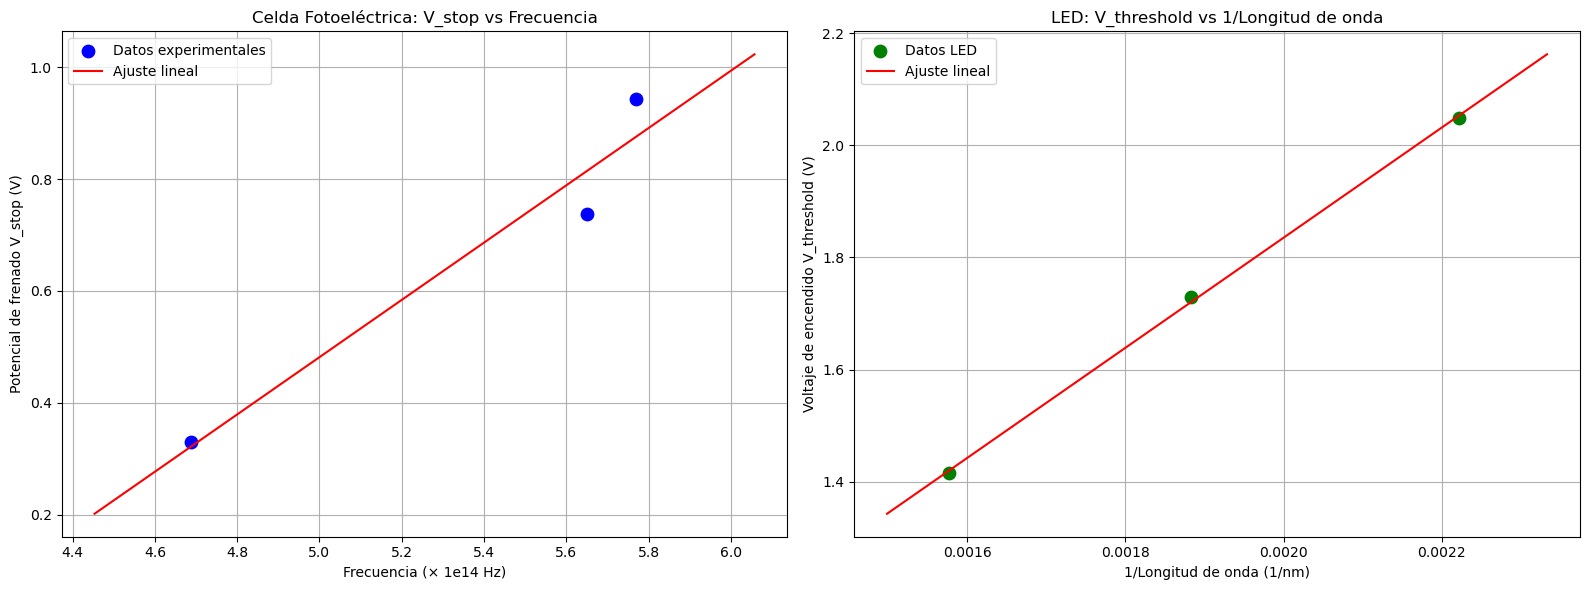

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
c = 3e8  # Velocidad de la luz en m/s
# Nota: Se usará la relación V ≡ energía en eV (q = 1)

# =============================
# Datos experimentales
# =============================
# Parte 1: Celda Fotoeléctrica
wavelengths1_nm = np.array([640, 531, 520])  # en nm
V_stop = np.array([0.330, 0.738, 0.943])       # en V

# Calcular la frecuencia (ν = c/λ) para cada LED.
wavelengths1_m = wavelengths1_nm * 1e-9
frequencies = c / wavelengths1_m  # en Hz
frequencies_scaled = frequencies / 1e14  # en 1e14 Hz

# Ajuste lineal: V_stop vs Frecuencia escalada
coef_pe = np.polyfit(frequencies_scaled, V_stop, 1)
m_fit, b_fit = coef_pe
h_est = m_fit / 1e14  # Estimación de h (eV·s)
phi_est = -b_fit      # Estimación de φ (eV)

# Parte 2: Emisión en LED
wavelengths2_nm = np.array([634, 531, 450])  # en nm
V_threshold = np.array([1.415, 1.73, 2.049])   # en V
inv_wavelengths = 1 / wavelengths2_nm  # en 1/nm

# Ajuste lineal: V_threshold vs 1/λ
coef_led = np.polyfit(inv_wavelengths, V_threshold, 1)
m_led, b_led = coef_led

# Impresión de resultados con 2 cifras significativas
print("=== Análisis Efecto Fotoeléctrico ===")
print("Pendiente del ajuste (m_fit): {} V/(1e14 Hz)".format(format(m_fit, ".2g")))
print("Constante de Planck estimada (h): {} eV·s".format(format(h_est, ".2g")))
print("Intercepto del ajuste: {} V".format(format(b_fit, ".2g")))
print("Función trabajo estimada (φ): {} eV".format(format(phi_est, ".2g")))

print("\n=== Análisis Emisión en LED ===")
print("Pendiente del ajuste (m_led): {} V·nm".format(format(m_led, ".2g")))
print("Intercepto del ajuste (b_led): {} V".format(format(b_led, ".2g")))

# Graficar ambas figuras horizontalmente
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfica 1: Celda Fotoeléctrica
axes[0].scatter(frequencies_scaled, V_stop, color='blue', s=80, label='Datos experimentales')
x_fit = np.linspace(frequencies_scaled.min()*0.95, frequencies_scaled.max()*1.05, 100)
y_fit = m_fit * x_fit + b_fit
axes[0].plot(x_fit, y_fit, 'r-', label='Ajuste lineal')
axes[0].set_xlabel('Frecuencia (× 1e14 Hz)')
axes[0].set_ylabel('Potencial de frenado V_stop (V)')
axes[0].set_title('Celda Fotoeléctrica: V_stop vs Frecuencia')
axes[0].legend()
axes[0].grid(True)

# Gráfica 2: LED
axes[1].scatter(inv_wavelengths, V_threshold, color='green', s=80, label='Datos LED')
x_fit_led = np.linspace(inv_wavelengths.min()*0.95, inv_wavelengths.max()*1.05, 100)
y_fit_led = m_led * x_fit_led + b_led
axes[1].plot(x_fit_led, y_fit_led, 'r-', label='Ajuste lineal')
axes[1].set_xlabel('1/Longitud de onda (1/nm)')
axes[1].set_ylabel('Voltaje de encendido V_threshold (V)')
axes[1].set_title('LED: V_threshold vs 1/Longitud de onda')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Resultados y Análisis

### 1. Experimento Fotoeléctrico

Utilizando los datos de la celda fotoeléctrica, se puede graficar el potencial de frenado $ V_{\text{stop}} $ en función de la frecuencia $ \nu $ (recordando que $ \nu = c/\lambda $). Al ajustar una línea recta a los puntos, la relación teórica

$$
V_{\text{stop}} = \frac{h}{q}\nu - \frac{\Phi}{q}
$$

permite obtener:
- **Pendiente:** proporcional a $ h $ (en eV·s, considerando $ q = 1 $ en unidades de eV).
- **Intercepto:** igual a $-\Phi$, lo que permite estimar la función trabajo del material.


### 2. Emisión en LED

Para los LED, la relación entre el voltaje umbral y la longitud de onda se expresa como:

$$
V_{\text{threshold}} \approx \frac{hc}{\lambda} + \text{pérdidas internas}
$$

Al graficar $ V_{\text{threshold}} $ frente a $ 1/\lambda $ se espera obtener:
- **Pendiente:** cercana a $ hc $ (en eV·nm), teóricamente alrededor de 1240 eV·nm.
- **Intercepto:** que representa las pérdidas internas o diferencias en la eficiencia del LED.


## Conclusiones

- **Confirmación del Modelo Teórico:**  
  Los datos experimentales muestran una dependencia lineal entre el potencial de frenado $ V_{\text{stop}} $ y la frecuencia $ \nu $, de acuerdo con la ecuación de Einstein para el efecto fotoeléctrico. Esto permite estimar la constante de Planck y la función trabajo $ \Phi $ del material utilizado en la celda.

- **Comparación de Métodos:**  
  El método basado en la medición del potencial de frenado (celda fotoeléctrica) presenta una menor incertidumbre en la determinación de la constante de Planck en comparación con el método basado en el voltaje umbral de los LED, ya que en estos últimos influyen factores internos como pérdidas y eficiencia del diodo.

- **Aplicaciones Prácticas:**  
  El estudio conjunto de ambos experimentos refuerza la comprensión de la relación entre energía, frecuencia y voltaje en dispositivos semiconductores, además de evidenciar la relevancia histórica y práctica del efecto fotoeléctrico en el desarrollo de la física moderna y de tecnologías optoelectrónicas.

En resumen, los resultados obtenidos respaldan las predicciones teóricas y permiten apreciar tanto las ventajas como las limitaciones de cada método experimental para la determinación de parámetros fundamentales en física.